In [27]:
from google.colab import files
import pandas as pd
import io
import zipfile

# Upload the files
uploaded = files.upload()

# Assuming you uploaded a zip file containing the CSV files
with zipfile.ZipFile(io.BytesIO(uploaded[list(uploaded.keys())[0]]), 'r') as zip_ref:
  # Extract all files to the current directory
  zip_ref.extractall('.')

# Read the files into pandas DataFrames, specifying the encoding if needed
# Make sure file names match the ones inside the .zip file.
# Use the actual filenames if they are different.
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

Saving archive.zip to archive (3).zip


Text(0, 0.5, 'Dias')

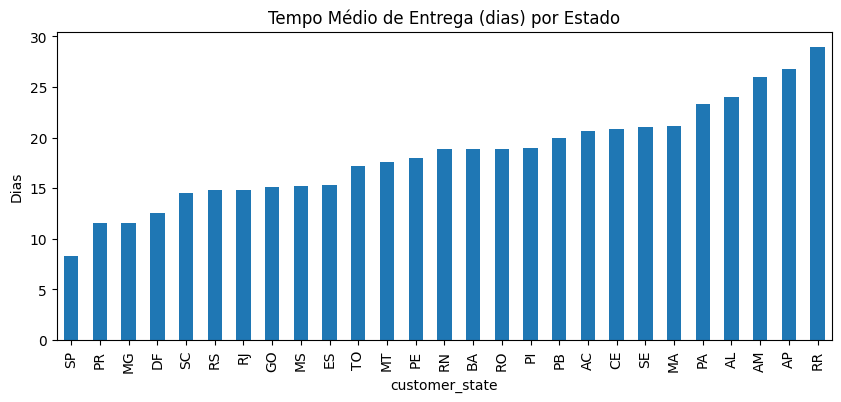

In [28]:
# Calcule dias para entrega
orders['delivery_time'] = (pd.to_datetime(orders['order_delivered_customer_date']) -
                         pd.to_datetime(orders['order_purchase_timestamp'])).dt.days

# Junte com dados de clientes
df_merged = orders.merge(customers, on='customer_id')

# Média por estado
delivery_by_state = df_merged.groupby('customer_state')['delivery_time'].mean().sort_values()

# Gráfico
delivery_by_state.plot(kind='bar', figsize=(10, 4))
plt.title("Tempo Médio de Entrega (dias) por Estado")
plt.ylabel("Dias")

Text(0.5, 1.0, 'Relação Preço vs. Frete')

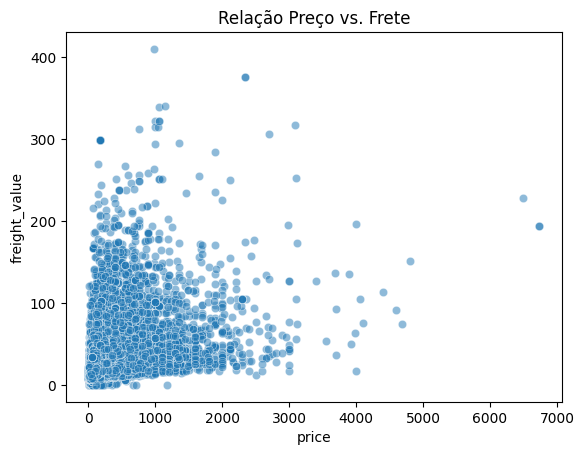

In [29]:
sns.scatterplot(data=order_items, x='price', y='freight_value', alpha=0.5)
plt.title("Relação Preço vs. Frete")

Text(0.5, 1.0, 'Top 10 Categorias Mais Vendidas')

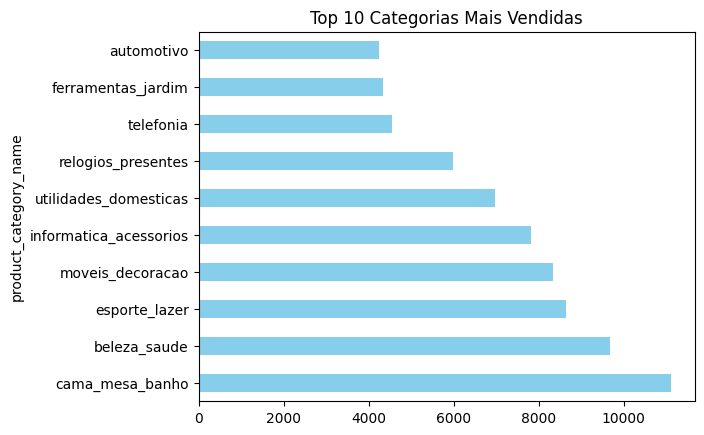

In [30]:
# Junte itens de pedido com produtos
df_products = order_items.merge(products, on='product_id')

# Conte vendas por categoria
top_categories = df_products['product_category_name'].value_counts().head(10)

# Gráfico
top_categories.plot(kind='barh', color='skyblue')
plt.title("Top 10 Categorias Mais Vendidas")

Text(0.5, 1.0, 'Distribuição das Avaliações (1-5)')

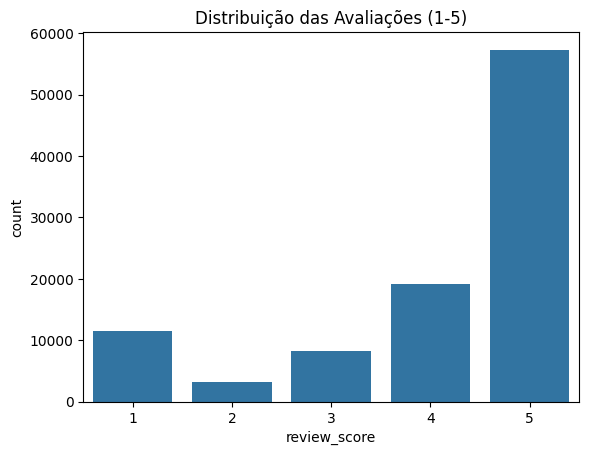

In [31]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
sns.countplot(data=reviews, x='review_score')
plt.title("Distribuição das Avaliações (1-5)")

Text(0.5, 1.0, 'Cancelamentos por Mês')

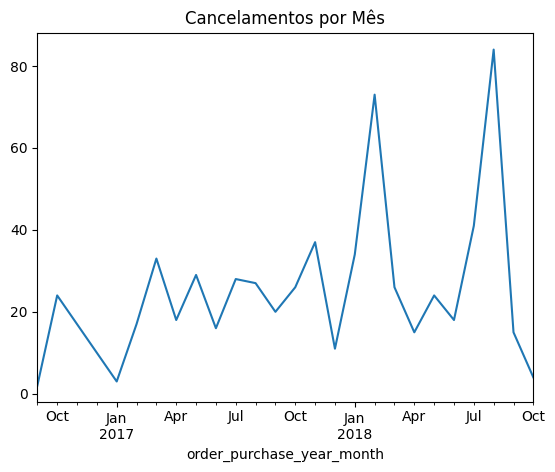

In [32]:
orders['order_purchase_year_month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.to_period('M')
canceled_orders = orders[orders['order_status'] == 'canceled']

canceled_orders.groupby('order_purchase_year_month').size().plot()
plt.title("Cancelamentos por Mês")

In [33]:
# Preencha tempos de entrega faltantes com a mediana
orders['delivery_time'].fillna(orders['delivery_time'].median(), inplace=True)

<ipython-input-33-ebab4ea45b85>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['delivery_time'].fillna(orders['delivery_time'].median(), inplace=True)


In [34]:
# Converta categorias para minúsculas
products['product_category_name'] = products['product_category_name'].str.lower()

In [35]:
# 1. Valor total do pedido (preço + frete)
order_items['total_price'] = order_items['price'] + order_items['freight_value']

# 2. Mês/ano da compra
orders['purchase_month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.to_period('M')

In [36]:
orders.to_csv('orders_clean.csv', index=False)
order_items.to_csv('order_items_clean.csv', index=False)

In [37]:
order_items.to_csv('order_items_clean.csv', index=False, encoding='utf-8')

In [38]:
order_items.to_csv('order_items_clean_fixed.csv', index=False, encoding='utf-8', sep=',')

In [39]:
# Salvar DataFrames como CSV
orders.to_csv('orders_clean.csv', index=False)
order_items.to_csv('order_items_clean.csv', index=False)
customers.to_csv('customers_clean.csv', index=False)
products.to_csv('products_clean.csv', index=False)

In [40]:
from google.colab import files
files.download('orders_clean.csv')
files.download('order_items_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# Versão otimizada para exportação
import os # Import the os module

def prepare_for_export(df):
    # Converter todas as colunas de texto para string
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str)

    # Converter períodos para string
    if 'purchase_month' in df.columns:
        df['purchase_month'] = df['purchase_month'].astype(str)

    return df

# Preparar e exportar os dados
order_items_clean = prepare_for_export(order_items)
order_items_clean.to_csv('order_items_clean_final.csv',
                        index=False,
                        encoding='utf-8',
                        date_format='%Y-%m-%d')

# Verificação final
print("Verificação final do arquivo:")
print(f"Número de linhas: {len(order_items_clean)}")
print(f"Tamanho do arquivo: {os.path.getsize('order_items_clean_final.csv')/1024/1024:.2f} MB") # Now os is defined and can be used
print("\nPrimeiras linhas:")
print(order_items_clean.head(3))

# Download
from google.colab import files
files.download('order_items_clean_final.csv')

Verificação final do arquivo:
Número de linhas: 112650
Tamanho do arquivo: 15.16 MB

Primeiras linhas:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  total_price  
0  2017-09-19 09:45:35   58.9          13.29        72.19  
1  2017-05-03 11:05:13  239.9          19.93       259.83  
2  2018-01-18 14:48:30  199.0          17.87       216.87  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>